# Data Analysis and Visualization

Through data analysis and visualization, we can attempt to answer questions about our data and about the metric that we have created

### Loading in the Data

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [41]:
games = pd.read_csv('../games.csv')
playerData = pd.read_csv('../players.csv')
tackleData = pd.read_csv('../tackles.csv')
plays = pd.read_csv("../plays.csv")

In [42]:
totaltracking = []

for i in range(9):
    string = '../tracking_week_' + str(i + 1) + '.csv'
    track = pd.read_csv(string)
    totaltracking.append(track)
    
trackingdata = pd.concat(totaltracking, axis=0, ignore_index=True)

In [43]:
#Concrete Stats for each tackle

ball_carrier = pd.DataFrame(plays.loc[:, ['playId', 'ballCarrierId', 'gameId', 'down', 'yardsToGo']])
ball_carrier['timeLeft'] = ((4 - plays['quarter']) * 15 + plays['gameClock'].str[:-3].astype(int)).astype(str) + plays['gameClock'].str[-3:]
ball_carrier['scoreDif'] = plays['preSnapHomeScore'].sub(plays['preSnapVisitorScore'])
ball_carrier['endZoneDistance'] = 100 - plays['absoluteYardlineNumber'] - plays['playResult']
ball_carrier['yardsto1st'] = plays['yardsToGo'] - plays['playResult']
ball_carrier['defensiveTeam'] = plays['defensiveTeam']
tackler = pd.DataFrame(tackleData.loc[:, ['playId', 'nflId', 'gameId']])
name = pd.DataFrame(playerData.loc[:, ['nflId', 'displayName']])

tackle_stats = pd.merge(ball_carrier, tackler, on=('playId', 'gameId'))
tackle_stats = pd.merge(tackle_stats, name, on='nflId')

tackle_stats

,playId,ballCarrierId,gameId,down,yardsToGo,timeLeft,scoreDif,endZoneDistance,yardsto1st,defensiveTeam,nflId,displayName
0,3537,48723,2022100908,1,10,7:52,14,22,1,TB,43306,Keanu Neal
1,84,47853,2022110609,2,10,59:50,0,12,5,TB,43306,Keanu Neal
2,1016,53555,2022102301,1,10,41:29,0,31,1,TB,43306,Keanu Neal
3,879,52460,2022110609,3,1,45:58,3,6,-1,TB,43306,Keanu Neal
4,97,46155,2022102700,1,10,59:18,0,42,5,TB,43306,Keanu Neal
...,...,...,...,...,...,...,...,...,...,...,...,...
17421,3790,54556,2022101607,4,1,5:10,8,1,-1,PIT,52904,Elijah Riley
17422,1945,53549,2022100905,2,10,26:45,16,72,11,DET,55030,Demetrius Taylor
17423,3201,47807,2022110604,2,10,7:24,4,14,7,JAX,48508,Andrew Wingard
17424,779,53454,2022103000,2,2,47:42,7,29,0,DEN,48308,Jonathan Kongbo


In [44]:
# Add clutch stat to dataframe

tackle_stats['clutchness'] = tackle_stats[['down', 'yardsToGo', 'scoreDif', 'yardsto1st', 'endZoneDistance']].mean(axis=1)

tackle_stats

,playId,ballCarrierId,gameId,down,yardsToGo,timeLeft,scoreDif,endZoneDistance,yardsto1st,defensiveTeam,nflId,displayName,clutchness
0,3537,48723,2022100908,1,10,7:52,14,22,1,TB,43306,Keanu Neal,9.6
1,84,47853,2022110609,2,10,59:50,0,12,5,TB,43306,Keanu Neal,5.8
2,1016,53555,2022102301,1,10,41:29,0,31,1,TB,43306,Keanu Neal,8.6
3,879,52460,2022110609,3,1,45:58,3,6,-1,TB,43306,Keanu Neal,2.4
4,97,46155,2022102700,1,10,59:18,0,42,5,TB,43306,Keanu Neal,11.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17421,3790,54556,2022101607,4,1,5:10,8,1,-1,PIT,52904,Elijah Riley,2.6
17422,1945,53549,2022100905,2,10,26:45,16,72,11,DET,55030,Demetrius Taylor,22.2
17423,3201,47807,2022110604,2,10,7:24,4,14,7,JAX,48508,Andrew Wingard,7.4
17424,779,53454,2022103000,2,2,47:42,7,29,0,DEN,48308,Jonathan Kongbo,8.0


In [45]:
# Create new dataframe that contains the averages of the tackle stats
# for each unique player in displayName_x

individual_tackling = tackle_stats.groupby('displayName')[['down', 'yardsToGo', 'scoreDif', 'yardsto1st', 'endZoneDistance', 'clutchness']].mean().reset_index()
individual_tackling['team'] = tackle_stats.groupby('displayName')['defensiveTeam'].first().reset_index()['defensiveTeam']
individual_tackling = averages_df.round({'down': 2, 'yardsToGo': 2, 'scoreDif': 2, 'yardsto1st': 2, 'endZoneDistance': 2, 'clutchness': 2})

individual_tackling

,displayName,down,yardsToGo,scoreDif,yardsto1st,endZoneDistance,clutchness,team,winningPct
0,A'Shawn Robinson,1.50,8.03,-3.08,4.67,36.83,9.59,LA,0.294
1,Aaron Donald,1.73,8.00,-0.90,5.87,33.43,9.63,LA,0.294
2,Bobby Wagner,1.91,7.83,0.09,3.33,31.03,8.84,LA,0.294
3,Cobie Durant,2.00,9.00,10.00,1.00,4.50,5.30,LA,0.294
4,Derion Kendrick,1.71,9.07,-2.43,-2.50,26.25,6.42,LA,0.294
...,...,...,...,...,...,...,...,...,...
794,Rashad Fenton,1.85,7.81,-6.23,-3.12,27.85,5.63,KC,0.824
795,Taylor Stallworth,1.00,6.00,2.00,4.00,75.50,17.70,KC,0.824
796,Tershawn Wharton,2.50,10.75,-6.00,5.25,23.00,7.10,KC,0.824
797,Trent McDuffie,1.50,11.00,-2.00,-13.00,12.50,2.00,KC,0.824


In [46]:
# Add winningPct and position to averages dataframe

pct = { 'team': ['LA', 'BUF', 'BAL', 'DET', 'ATL', 'NYG', 'JAX', 'GB', 'NE', 'PIT', 'NYJ', 'MIN', 'CIN', 'SF',
                    'TB', 'SEA', 'CHI', 'DEN', 'CLE', 'LAC', 'NO', 'TEN', 'CAR', 'LV', 'MIA', 'DAL', 'ARI', 'PHI',
                    'IND', 'WAS', 'HOU', 'KC'],
           'winningPct': [.294, .813, .588, .529, .412, .559, .529, .471, .471, .529, .412, .765, .750, .765,
                         .471, .529, .176, .294, .412, .588, .412, .412, .412, .353, .529, .706, .235, .824,
                         .265, .500, .206, .824] }

pct = pd.DataFrame(data=pct)

# add winning pct to player tackle stats dataframe

individual_tackling = pd.merge(averages_df, pct, on='team')

individual_tackling

# add position to dataframe

individual_tackling = pd.merge(averages_df, playerData[['position', 'displayName']], on='displayName')

individual_tackling

# save individual_tackling as CSV for use in clustering notebook

individual_tackling.to_csv('../individual_tackling.csv', index=False)

# Plotting Clutchness of Players on a Team vs. Overall Team Record

Text(0, 0.5, 'winningPct')

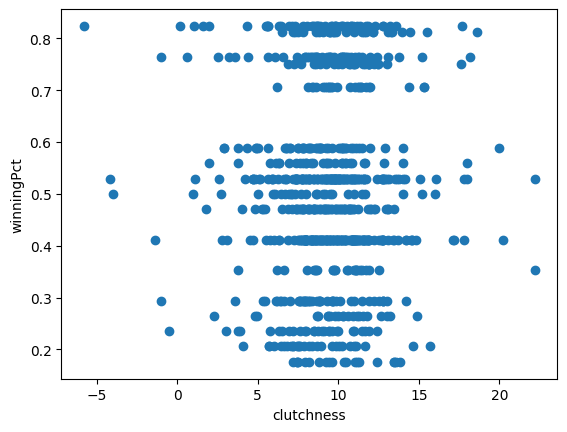

In [47]:
plt.scatter(individual_tackling['clutchness'], individual_tackling['winningPct'])
plt.xlabel('clutchness')
plt.ylabel('winningPct')

# Plotting Clutchness of Players vs Position

Text(0, 0.5, 'position')

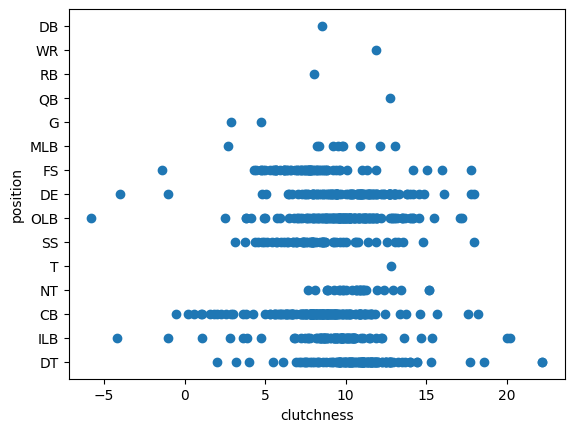

In [48]:
plt.scatter(individual_tackling['clutchness'], individual_tackling['position'])
plt.xlabel('clutchness')
plt.ylabel('position')

We can see here that there are some slight variations across position.  For example, free safeties (FS) tend to be a little less clutch than defensive ends (DE) in general